# <center>NetSpend 2022 - Analyzing Internet Costs Worldwide through EDA</center>

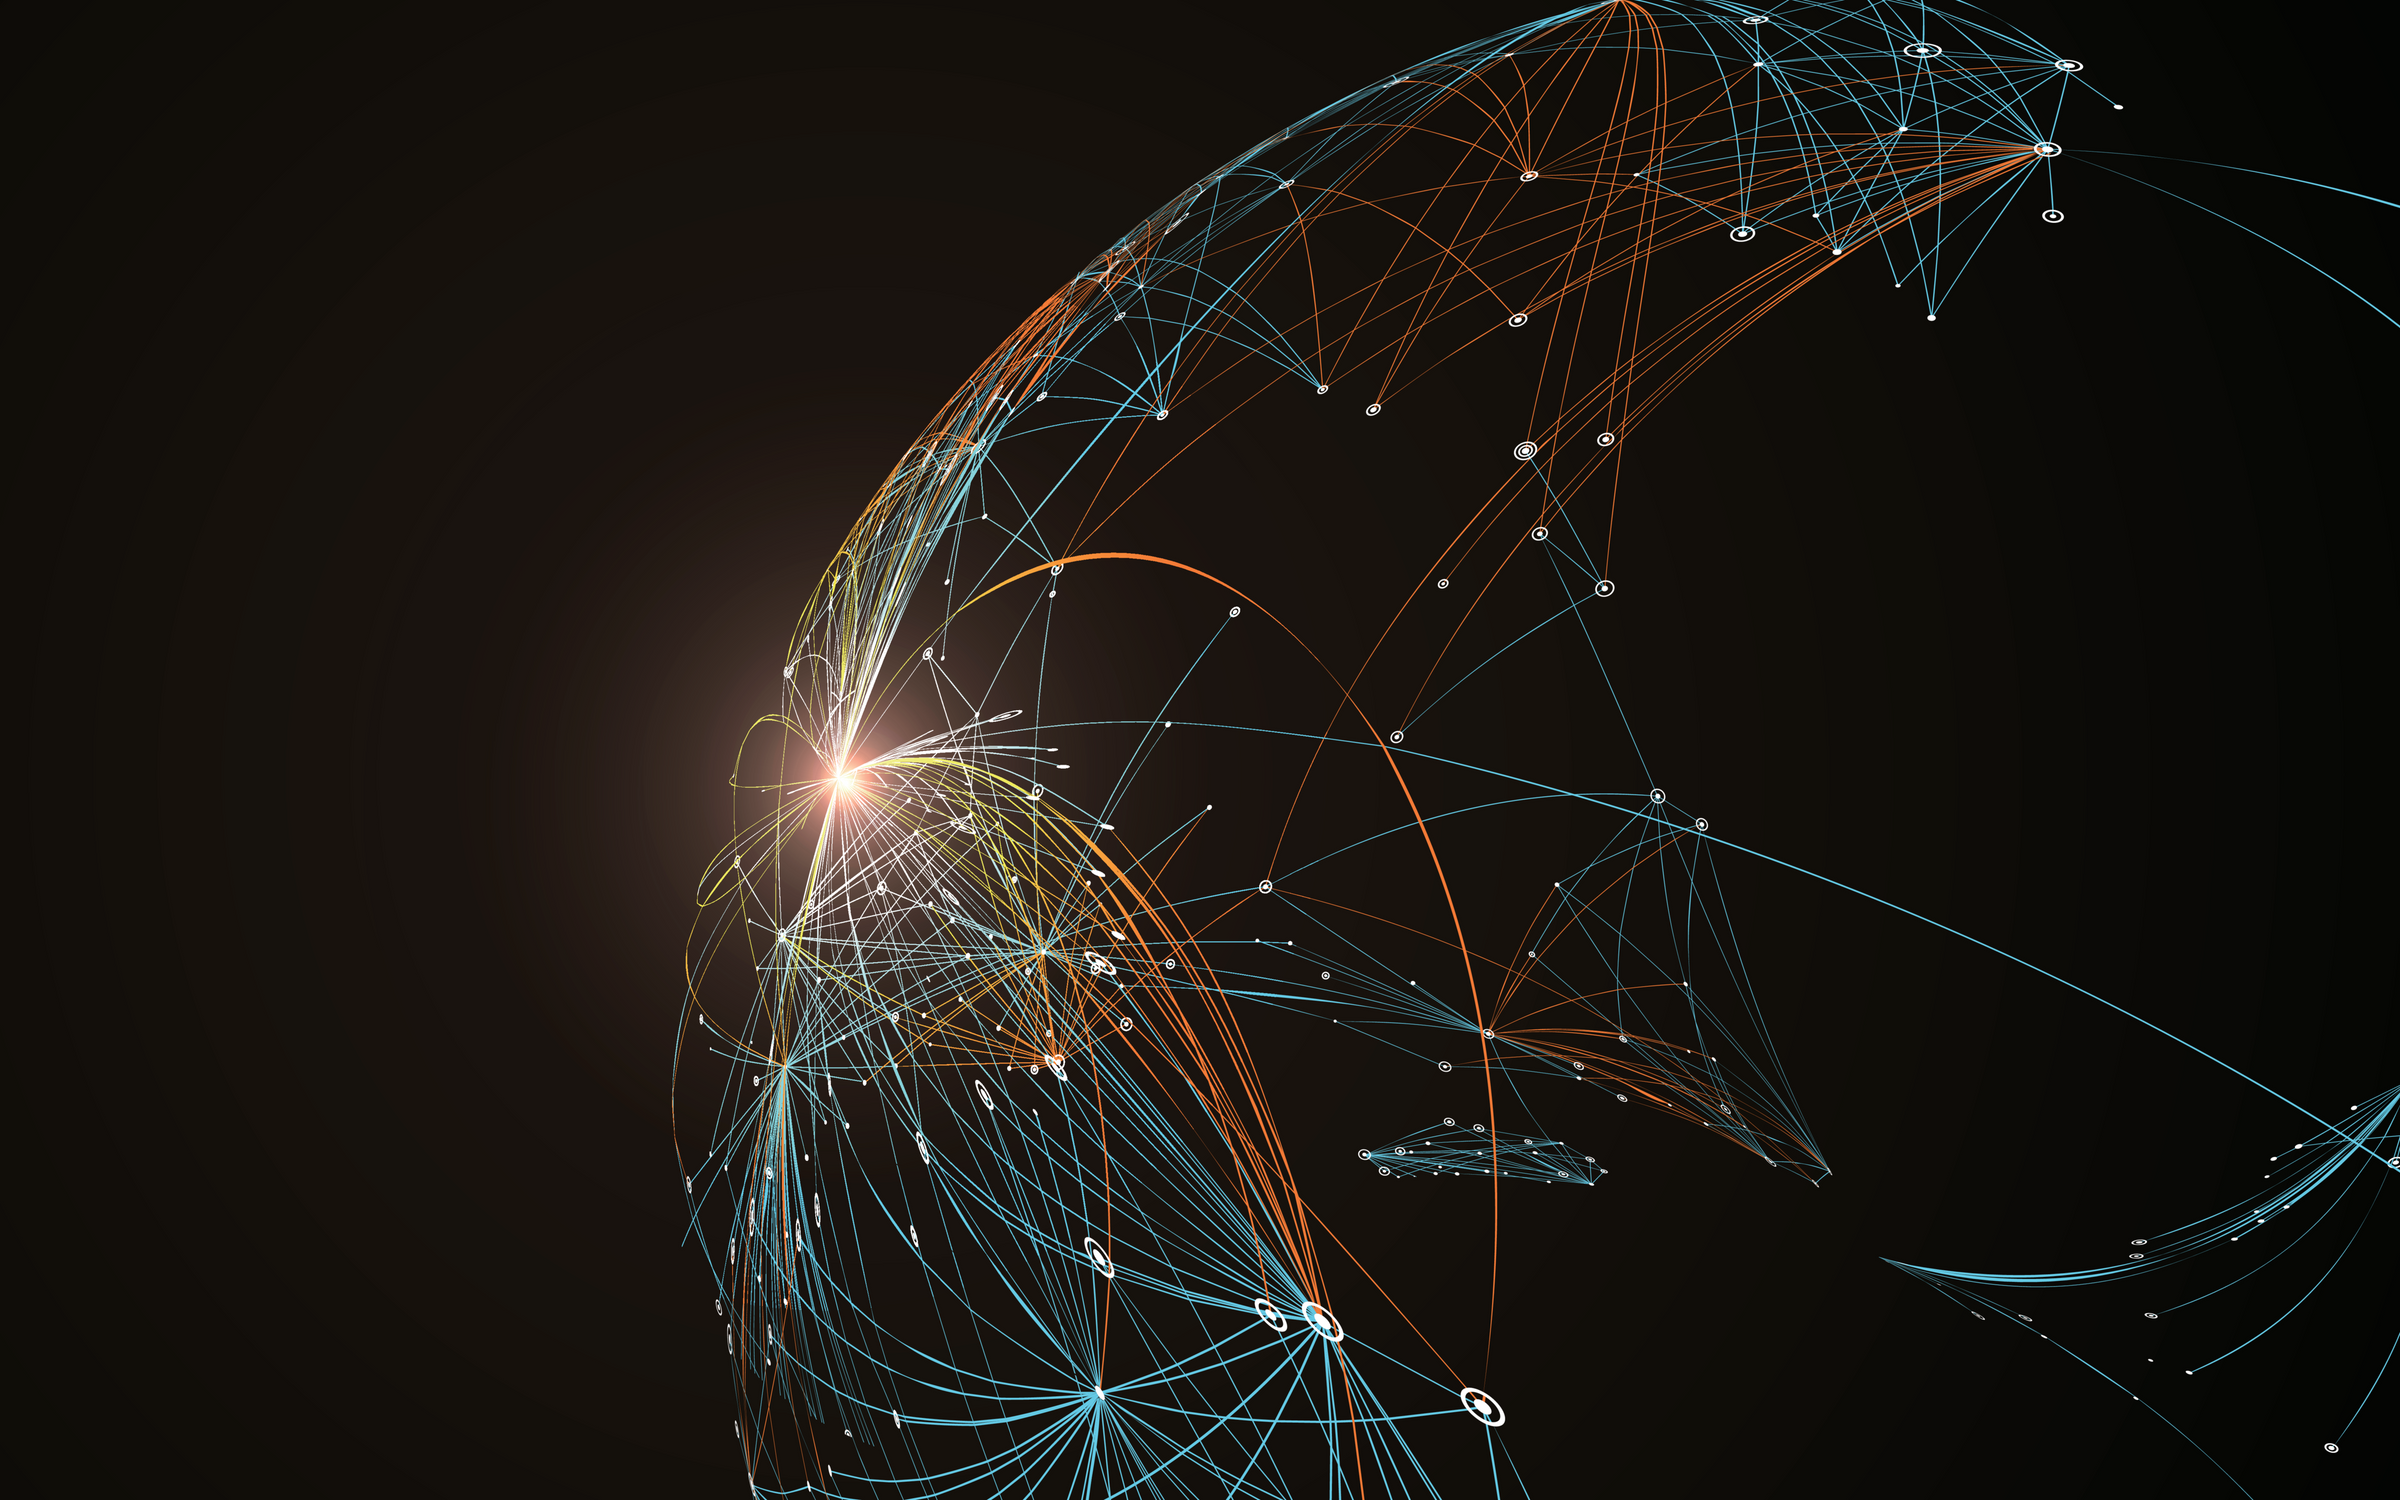


**About the Dataset:**

The dataset contains information regarding internet prices in almost all countries, encompassing the following columns:

- **Country Code:** A unique code assigned to each country.
- **Country:** The name of the country under consideration.
- **Population:** The total population of the country.
- **Continental Region:** The specific continental region to which the country belongs.
- **No. of Internet Plans:** The count of different internet plans available in the country.
- **Average Price of 1GB (USD):** The mean cost of 1 gigabyte of internet data, denominated in USD.
- **Cheapest 1GB for 30 Days (USD):** The price of the least expensive 1 gigabyte internet plan for a duration of 30 days, in USD.
- **Most Expensive 1GB (USD):** The cost of the most high-priced 1 gigabyte internet plan, stated in USD.
- **Average Price of 1GB (USD - at the Start of 2020):** The average expense of 1 gigabyte of internet data at the commencement of 2020, in USD.
- **Average Price of 1GB (USD - at the Start of 2021):** The average cost of 1 gigabyte of internet data at the outset of 2021, in USD.

**Objective:**

The main objective of this project is to perform an in-depth Exploratory Data Analysis (EDA) on the provided dataset. The EDA process involves a comprehensive analysis of the data to draw insights, recognize patterns, and detect trends in internet costs across the globe. The analysis will facilitate the understanding of relationships between different variables and grant valuable insights into the divergence of internet expenses among various countries. Visualizations, summary statistics, and diverse data exploration techniques will be employed to extract significant knowledge from the dataset.

Furthermore, the historical evolution of internet access in India, along with its integration into the populace, adds context to the global analysis. This context could potentially enrich the interpretation of the observed global trends within the dataset.


## Imports

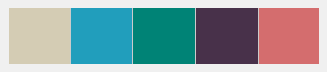

/kaggle/input/1-gb-internet-price/worldwide internet users - users.csv
/kaggle/input/1-gb-internet-price/worldwide internet speed in 2022  - avg speed.csv
/kaggle/input/1-gb-internet-price/all_csv sorted.csv
/kaggle/input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv


In [1]:
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
import plotly.express as px
import plotly.io as pio

# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#d4ccb4", "#219ebc", "#008376", "#48314a", "#d46d6e"]
plaette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("Solarize_Light2")

# ignore warnings
warnings.filterwarnings('ignore')



In [2]:
!pip install missingno

## 1. Data Collection 💽

In [3]:
df = pd.read_csv('../input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv')
df

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68
...,...,...,...,...,...,...,...,...,...
237,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
240,CD,Congo (Democratic Republic of),SUB-SAHARAN AFRICA,NaN,Prices listed in non-convertible 'units',NaN,NaN,NaN,NaN


### 1.1 Data Info 🧾

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      241 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

### 1.2 Data Type 🟠🟡🟢

In [5]:
df.dtypes

Country code                                         object
Name                                                 object
Continental region                                   object
NO. OF Internet Plans                               float64
Average price of 1GB (USD)                           object
Cheapest 1GB for 30 days (USD)                       object
Most expensive 1GB (USD)                             object
Average price of 1GB (USD  at the start of 2021)     object
Average price of 1GB (USD – at start of 2020)        object
dtype: object

### 1.3 Data Describe

In [6]:
df.describe()

,NO. OF Internet Plans
count,230.000000
mean,26.730435
std,16.468216
min,1.000000
25%,15.000000
50%,22.000000
75%,36.000000
max,60.000000


## 2. Data Cleaning 🧹     
Data cleaning refers to the process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it. Such anomalies can disproportionately skew the data and hence adversely affect the results. Some steps that can be done to clean data are:

- Removing missing values   
- Outliers 
- Unnecessary rows/ columns.

### 2.1 Missing Values 🚫

In [7]:
df.isnull().sum()

Country code                                         1
Name                                                 0
Continental region                                   0
NO. OF Internet Plans                               12
Average price of 1GB (USD)                           0
Cheapest 1GB for 30 days (USD)                      12
Most expensive 1GB (USD)                            12
Average price of 1GB (USD  at the start of 2021)    12
Average price of 1GB (USD – at start of 2020)       12
dtype: int64

<AxesSubplot:>

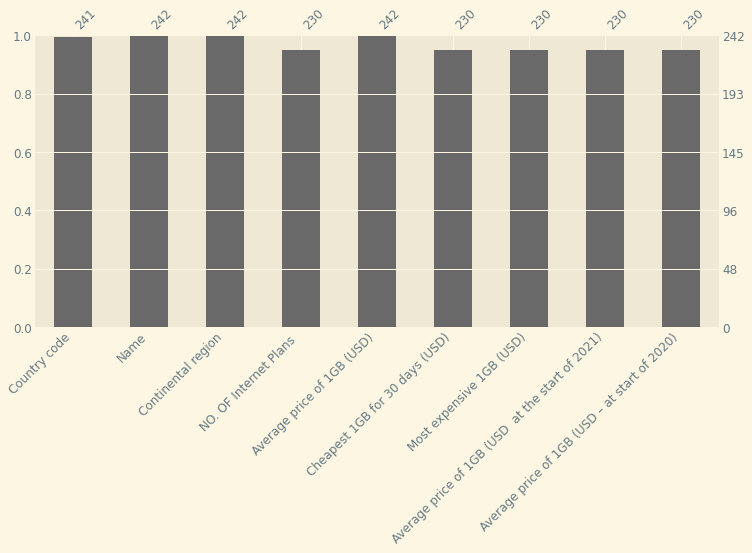

In [8]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
msno.bar(df, ax = axz, fontsize = 12)

There is several columns have null values, so we will drop these rows from our data set

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Country code                                        0
Name                                                0
Continental region                                  0
NO. OF Internet Plans                               0
Average price of 1GB (USD)                          0
Cheapest 1GB for 30 days (USD)                      0
Most expensive 1GB (USD)                            0
Average price of 1GB (USD  at the start of 2021)    0
Average price of 1GB (USD – at start of 2020)       0
dtype: int64

### 2.2 Cleaning Up Currency Data   💵  
Let’s try removing the ‘$’ and ‘,’ using regular expression to remove the non-numeric characters from the string

In [11]:
# get all rows contains digits 
df=df[df['Average price of 1GB (USD  at the start of 2021)'].str.startswith('$')]
df=df[df['Average price of 1GB (USD – at start of 2020)'].str.startswith('$')]


In [12]:
df['Average price of 1GB (USD)'] = df['Average price of 1GB (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Cheapest 1GB for 30 days (USD)'] = df['Cheapest 1GB for 30 days (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Most expensive 1GB (USD)'] = df['Most expensive 1GB (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Average price of 1GB (USD  at the start of 2021)'] = df['Average price of 1GB (USD  at the start of 2021)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Average price of 1GB (USD – at start of 2020)'] = df['Average price of 1GB (USD – at start of 2020)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [13]:
df.columns

Index(['Country code', 'Name', 'Continental region', 'NO. OF Internet Plans ',
       'Average price of 1GB (USD)', 'Cheapest 1GB for 30 days (USD)',
       'Most expensive 1GB (USD)',
       'Average price of 1GB (USD  at the start of 2021)',
       'Average price of 1GB (USD – at start of 2020)'],
      dtype='object')

## 3. Visualization.  📊
### 3.1 Univariate Analysis  
In Univariate Analysis, you analyze data of just one variable. A variable in your dataset refers to a single feature/ column. You can do this either with graphical or non-graphical means by finding specific mathematical values in the data. 
#### 3.1.1 Most expensive 1GB (USD)

<AxesSubplot:xlabel='Most expensive 1GB (USD)', ylabel='Count'>

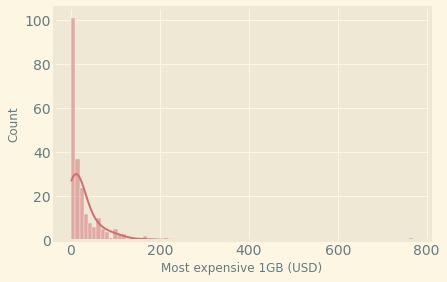

In [14]:

sns.histplot(data=df, x="Most expensive 1GB (USD)", kde=True,   color=plaette[4])


#### 3.1.2 NO. OF Internet Plans 

<AxesSubplot:xlabel='NO. OF Internet Plans ', ylabel='Count'>

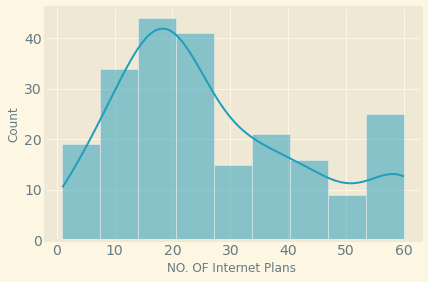

In [15]:
sns.histplot(data=df, x="NO. OF Internet Plans ", kde=True,   color=plaette[1])

#### 3.1.3 Cheapest 1GB for 30 days (USD) 

<AxesSubplot:xlabel='Cheapest 1GB for 30 days (USD)', ylabel='Count'>

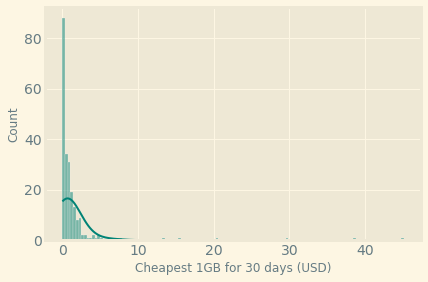

In [16]:
sns.histplot(data=df, x="Cheapest 1GB for 30 days (USD)", kde=True,   color=plaette[2])


#### 3.1.4 Average price of 1GB (USD  at the start of 2021)

<AxesSubplot:xlabel='Average price of 1GB (USD  at the start of 2021)', ylabel='Count'>

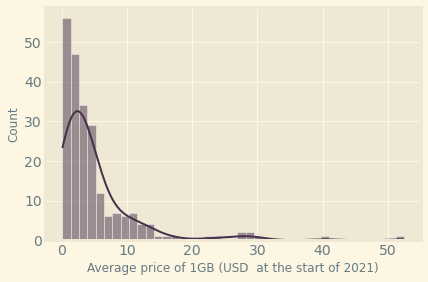

In [17]:
sns.histplot(data=df, x="Average price of 1GB (USD  at the start of 2021)", kde=True,   color=plaette[3])


### 3.2 Bivariate Analysis   
#### 3.2.1 Average price of 1GB (USD  at the start of 2021) and Average price of 1GB (USD – at start of 2020)


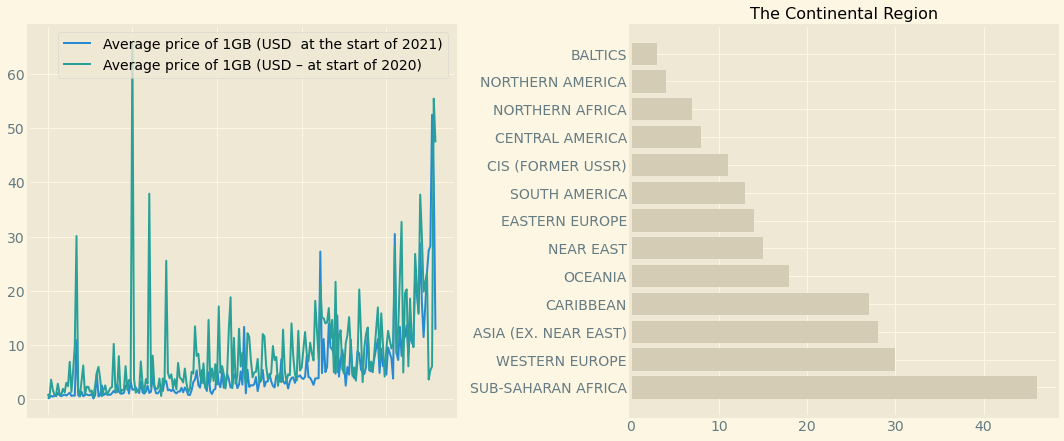

In [18]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)

g = sns.lineplot(data=df[['Average price of 1GB (USD  at the start of 2021)','Average price of 1GB (USD – at start of 2020)']],  dashes = False)

g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df['Continental region'].value_counts().index, df['Continental region'].value_counts(),color=plaette[0])
plt.title("The Continental Region")
plt.tight_layout()

#### 3.2.2 Most expensive 1GB by Continental region

Text(0.5, 1.0, 'Most expensive 1GB by Continental region')

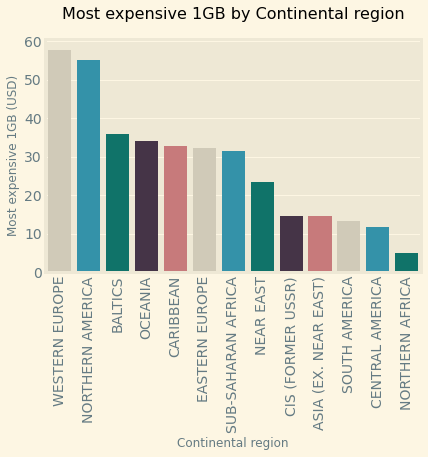

In [19]:
most_exp = df.groupby(['Continental region'])['Most expensive 1GB (USD)'].mean().reset_index().sort_values('Most expensive 1GB (USD)', ascending = False)
g = sns.barplot(x="Continental region", y="Most expensive 1GB (USD)", data=most_exp,palette=plaette)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Most expensive 1GB by Continental region', pad=20)

#### 3.2.3 Cheapest 1GB for 30 days (USD) by Continental region

Text(0.5, 1.0, 'Cheapest 1GB for 30 days (USD) by Continental region')

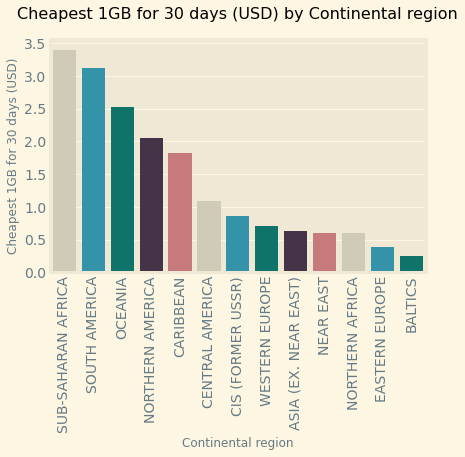

In [20]:
most_exp = df.groupby(['Continental region'])['Cheapest 1GB for 30 days (USD)'].mean().reset_index().sort_values('Cheapest 1GB for 30 days (USD)', ascending = False)
g = sns.barplot(x="Continental region", y="Cheapest 1GB for 30 days (USD)", data=most_exp,palette=plaette)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Cheapest 1GB for 30 days (USD) by Continental region', pad=20)


#### 3.2.4 Most expensive 1GB by Country

Text(0.5, 1.0, 'Top 10 Country - Most expensive 1GB Country')

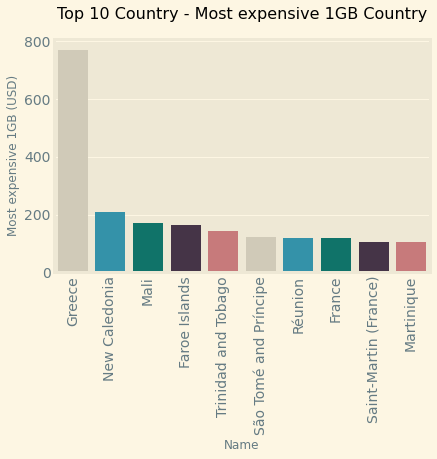

In [21]:
max_exp = df.groupby(['Name'])['Most expensive 1GB (USD)'].max().reset_index().sort_values('Most expensive 1GB (USD)', ascending = False)
g = sns.barplot(x="Name", y="Most expensive 1GB (USD)", data=max_exp[:10],palette=plaette)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Top 10 Country - Most expensive 1GB Country', pad=20)

#### 3.2.5 NO. OF Internet Plans and Average price of 1GB (USD)

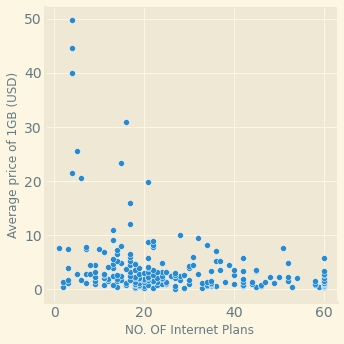

In [22]:
sns.relplot(x="NO. OF Internet Plans ", y="Average price of 1GB (USD)", data=df);


## 4. Geospatial Analysis using Plotly 🗺

In [23]:
fig = px.choropleth(df, locations='Name', locationmode='country names',scope='world',color='Most expensive 1GB (USD)',color_continuous_scale=px.colors.diverging.Earth)
fig

In [24]:
fig = px.choropleth(df, locations='Name', locationmode='country names',scope='world',color='Cheapest 1GB for 30 days (USD)',color_continuous_scale=px.colors.diverging.Earth)
fig